# Best Photo Selection

*   With organic data of our own collection. Advanced Model ResNet50.


## Giving a score for how good or bad a photograph is.

Train data is based on:

*   400 good photos.
*   400 bad photos.

Validation data is based on:

*   100 good photos.
*   100 bad photos.

Test data is based on:

*   100 good photos.
*   100 bad photos.

In [1]:
# loading libraries
import numpy as np
import os
from PIL import Image

### Step 1: Upload the photos to train and test folders. Each folder containing "bad" and "good" folders. Or mount the folders from google drive.

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Upload organic data
!unzip organic.zip

Archive:  organic.zip
   creating: organic/
   creating: organic/test/
   creating: organic/test/bad/
  inflating: organic/test/bad/1x08.jpg  
  inflating: organic/test/bad/20140421_102006.jpg  
  inflating: organic/test/bad/20161112_154253.jpg  
  inflating: organic/test/bad/20161201_184006.jpg  
  inflating: organic/test/bad/20170729_191758.jpg  
  inflating: organic/test/bad/20170922_222236.jpg  
  inflating: organic/test/bad/20190103_084049.jpg  
  inflating: organic/test/bad/20190325_190942.jpg  
  inflating: organic/test/bad/20190613_085824.jpg  
  inflating: organic/test/bad/244BDCEB-B9E9-4223-A81B-B161F2A12CA6.jpg  
  inflating: organic/test/bad/aiony-haust-f2ar0ltTvaI-unsplash.jpg  
  inflating: organic/test/bad/alena-plotnikova-Ke5LK0X0MjI-unsplash.jpg  
  inflating: organic/test/bad/andy-gusnan-J-FaonCcC6Y-unsplash.jpg  
  inflating: organic/test/bad/annie-spratt-Ewfrjh0GvtY-unsplash.jpg  
  inflating: organic/test/bad/annie-spratt-Nap1YhD7_og-unsplash.jpg  
  inflating: org

### Step 2: Data preparation

In [4]:
from keras.preprocessing.image import ImageDataGenerator
img_gen = ImageDataGenerator(validation_split=0.2)

In [5]:
train_data = img_gen.flow_from_directory(
    'organic/train/',
    class_mode='binary',
    batch_size=64,
    target_size=(224, 224),
    subset='training',
)

Found 800 images belonging to 2 classes.


In [6]:
valid_data = img_gen.flow_from_directory(
    'organic/train/',
    class_mode='binary',
    batch_size=64,
    target_size=(224, 224),
    subset='validation',
)

Found 200 images belonging to 2 classes.


In [7]:
print('there are 800 images in the training set and', len(train_data), 'mini-batches')
print('there are 200 images in the validation set and', len(valid_data), 'mini-batches')

there are 800 images in the training set and 13 mini-batches
there are 200 images in the validation set and 4 mini-batches


### Step 3: An advanced model using ResNet50

In [8]:
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
from tensorflow.keras.applications import ResNet50
resnet_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

94781440/94765736 [==============================] - 1s 0us/step


In [10]:
for layer in resnet_model.layers:
    layer.trainable = False

In [11]:
print('there are', len(resnet_model.layers), 'layers in resnet_model')
print('there are', resnet_model.count_params(), 'parameters in resnet_model')

there are 175 layers in resnet_model
there are 23587712 parameters in resnet_model


In [12]:
print('input shape is', resnet_model.input_shape)
print('output shape is', resnet_model.output_shape)
resnet_model.summary()

input shape is (None, 224, 224, 3)
output shape is (None, 7, 7, 2048)
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                     

In [13]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

resnet_model = Sequential()
resnet_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
resnet_model.add(Dense(1, activation='sigmoid'))

In [14]:
checkpoint_path = "training_1/resnet50.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [15]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [16]:
resnet_model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['acc'])

In [17]:
# Training the model for 10 epochs
# model.fit(train_data, steps_per_epoch = len(train_data), epochs = 10, validation_data = valid_data, validation_steps = len(valid_data), callbacks=[cp_callback])
resnet_model.fit(train_data, steps_per_epoch = 100, validation_data = valid_data, validation_steps = 100, epochs = 10, callbacks=[cp_callback])

Epoch 1/10
100/100 [==============================] - 109s 1s/step - loss: 4.3135 - acc: 0.8321 - val_loss: 8.6229 - val_acc: 0.7500

Epoch 1: saving model to training_1/resnet50.ckpt
Epoch 2/10
100/100 [==============================] - 100s 1s/step - loss: 0.3209 - acc: 0.9793 - val_loss: 1.5212 - val_acc: 0.7146

Epoch 2: saving model to training_1/resnet50.ckpt
Epoch 3/10
100/100 [==============================] - 101s 1s/step - loss: 0.1541 - acc: 0.9893 - val_loss: 0.8091 - val_acc: 0.7794

Epoch 3: saving model to training_1/resnet50.ckpt
Epoch 4/10
100/100 [==============================] - 100s 1s/step - loss: 0.0911 - acc: 0.9934 - val_loss: 1.3453 - val_acc: 0.7046

Epoch 4: saving model to training_1/resnet50.ckpt
Epoch 5/10
100/100 [==============================] - 100s 1s/step - loss: 0.0694 - acc: 0.9938 - val_loss: 1.9726 - val_acc: 0.6850

Epoch 5: saving model to training_1/resnet50.ckpt
Epoch 6/10
100/100 [==============================] - 101s 1s/step - loss: 0.026

In [18]:
os.listdir(checkpoint_dir)

['resnet50.ckpt.data-00000-of-00001', 'checkpoint', 'resnet50.ckpt.index']

#### Pickling the model

In [19]:
# import pickle
# pickle.dump(resnet_model, open('training_1/resnet50.pkl', 'wb'))

#### Zip the model and train data and download the files to local computer

In [20]:
!zip -r /content/model.zip /content/training_1
!zip -r /content/train.zip /content/organic/train
!zip -r /content/test.zip /content/organic/test

  adding: content/training_1/ (stored 0%)
  adding: content/training_1/resnet50.ckpt.data-00000-of-00001 (deflated 7%)
  adding: content/training_1/checkpoint (deflated 40%)
  adding: content/training_1/resnet50.ckpt.index (deflated 80%)
  adding: content/organic/train/ (stored 0%)
  adding: content/organic/train/bad/ (stored 0%)
  adding: content/organic/train/bad/allef-vinicius-DJNoNHpQK_I-unsplash.jpg (deflated 1%)
  adding: content/organic/train/bad/marie-michele-bouchard-LzBiWjPChgc-unsplash.jpg (deflated 0%)
  adding: content/organic/train/bad/nathan-dumlao-C1BYZq1Ea0o-unsplash.jpg (deflated 2%)
  adding: content/organic/train/bad/tiko-giorgadze-WSH-upIXDNA-unsplash.jpg (deflated 0%)
  adding: content/organic/train/bad/oleg-ivanov-NWT7mww0RPw-unsplash.jpg (deflated 1%)
  adding: content/organic/train/bad/IMG_20220310_024015602.jpg (deflated 12%)
  adding: content/organic/train/bad/tim-doerfler-dYNar7pk9_Y-unsplash.jpg (deflated 0%)
  adding: content/organic/train/bad/IMG_20191217

In [21]:
from google.colab import files
files.download("/content/model.zip")
files.download("/content/train.zip")
files.download("/content/test.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Step 4: testing the model

In [22]:
threshold = 0.5

In [23]:
test_data = img_gen.flow_from_directory(
    'organic/test/',
    target_size=(224, 224),
    class_mode=None,
    shuffle=False,
)

Found 200 images belonging to 2 classes.


In [25]:
# pred = resnet_model.predict_generator(generator=test_data)

In [26]:
bad_folder = 'organic/test/bad/'
bad_test_files = os.listdir(bad_folder)
print('Totel number of images on the bad test set is', len(bad_test_files))

Totel number of images on the bad test set is 100


In [27]:
good_folder = 'organic/test/good/'
good_test_files = os.listdir(good_folder)
print('Totel number of images on the good test set is', len(good_test_files))

Totel number of images on the good test set is 100


In [28]:
from tensorflow import keras

def pred(img_fname):
    img = keras.utils.load_img(img_fname, target_size=(224, 224))
    x = keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    pred = resnet_model.predict(x)[0][0]
    return pred

In [29]:
from PIL import Image
from tqdm import tqdm
pred_score = list()

In [30]:
for filename in tqdm(bad_test_files):
    pred_score.append(pred(bad_folder + filename))

100%|██████████| 100/100 [00:09<00:00, 10.01it/s]


In [31]:
for filename in tqdm(good_test_files):
    pred_score.append(pred(good_folder + filename))

100%|██████████| 100/100 [00:10<00:00,  9.85it/s]


In [32]:
pred = np.array(pred_score)

In [33]:
y_true = test_data.classes
y_pred = pred > threshold

#### Confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_true, y_pred)

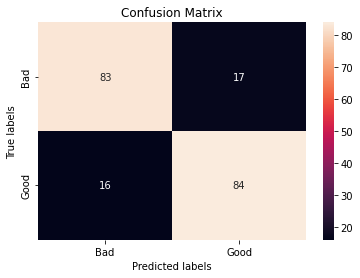

In [35]:
import seaborn as sns
from matplotlib import pyplot as plt

ax = plt.subplot()
sns.heatmap(mat, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Bad', 'Good']); ax.yaxis.set_ticklabels(['Bad', 'Good']);

#### Classification report

In [36]:
from sklearn.metrics import classification_report
target_names = ['bad', 'good']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         bad       0.84      0.83      0.83       100
        good       0.83      0.84      0.84       100

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200



#### Evaluating samples of test data

In [37]:
def evaluate(img_fname):
    img = image.load_img(img_fname, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    pred = resnet_model.predict(x)[0][0]
    pred_class = 'good' if pred > threshold else 'bad'
    pred = pred if pred_class == 'good' else 1 - pred
    print('Predicted:', pred_class, 'with prediction (confidence) of ' + str(round(pred, 3)))
    plt.imshow(img)
    plt.show()

Predicted: bad with prediction (confidence) of 0.832


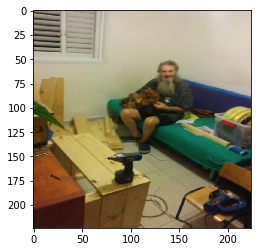

Predicted: bad with prediction (confidence) of 1.0


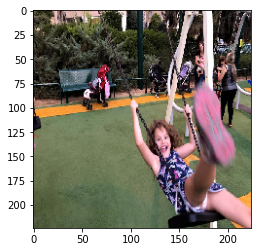

Predicted: good with prediction (confidence) of 1.0


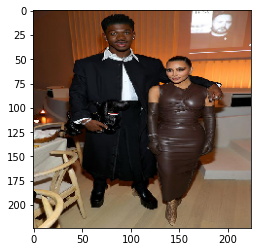

Predicted: good with prediction (confidence) of 0.919


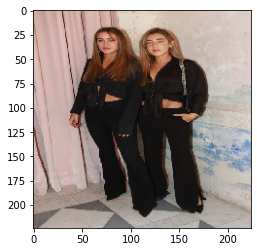

Predicted: bad with prediction (confidence) of 1.0


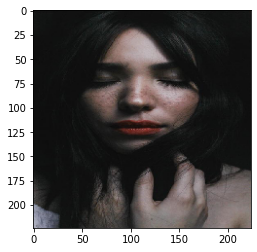

Predicted: bad with prediction (confidence) of 0.995


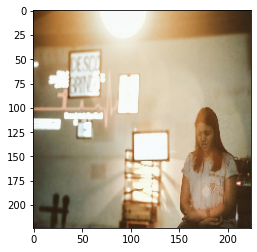

Predicted: good with prediction (confidence) of 1.0


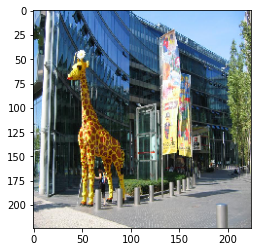

Predicted: bad with prediction (confidence) of 0.993


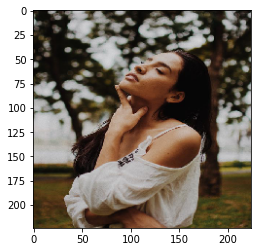

Predicted: bad with prediction (confidence) of 1.0


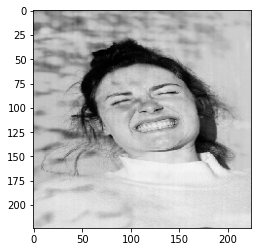

Predicted: good with prediction (confidence) of 1.0


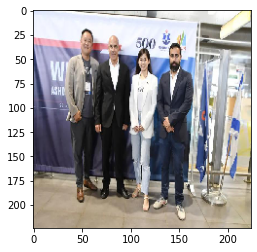

In [38]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import random

for img in random.sample(test_data.filenames, 10):
    evaluate('organic/test/' + str(img))